## Sign Language Classification
### A sign language classification project involves the development of a system or model that can interpret and classify sign language gestures or signs into their corresponding meanings or words. This project is primarily aimed at improving communication and accessibility for individuals who use sign language as their primary means of communication, especially those who are deaf or hard of hearing.The primary goal of a sign language classification project is to create a system that can accurately recognize and interpret sign language gestures, converting them into text or spoken language. This assists in bridging the communication gap between individuals who use sign language and those who do not.

#### Importing necessary header files

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img

#### Reading the dataset

In [16]:
train=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Sign language/sign_mnist_train/sign_mnist_train.csv")
test=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Sign language/sign_mnist_test/sign_mnist_test.csv")

In [17]:
'''with open(train) as train_file:
    line=train_file.readline()
    print(f'header:\n {line} ')
    line=train_file.readline()
    print(f'Each line: \n {line}')'''
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [18]:
train.shape

(27455, 785)

In [19]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [20]:
test.shape

(7172, 785)

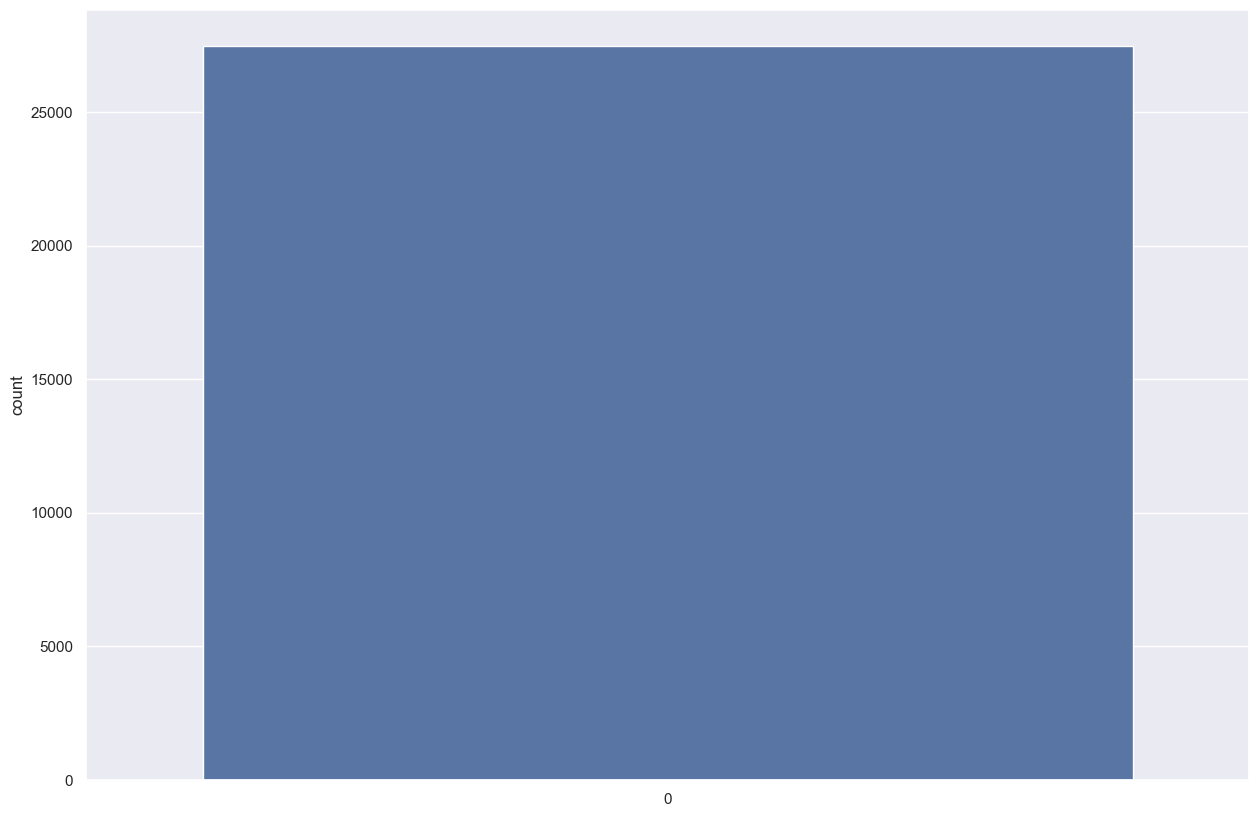

In [21]:
plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
sns.countplot(train['label'])
plt.show()

In [22]:
y_train=train['label']
df_train=train.copy()
df_train.drop(['label'],axis=1,inplace=True)
df_train.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,167,169,170,171,171,172,172,172,171,172,...,215,215,211,208,211,201,167,119,75,48
27446,133,135,138,141,143,144,144,145,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,170,172,175,177,179,182,185,186,187,188,...,221,228,229,228,229,229,227,228,227,227
27448,149,151,153,157,159,161,164,165,168,171,...,108,165,167,163,159,153,147,148,139,196


In [23]:
y_test=test['label']
df_test=test.copy()
df_test.drop(['label'],axis=1,inplace=True)
df_test.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,130,131,131,134,133,135,137,136,136,137,...,128,106,107,63,11,147,194,182,176,124
7163,158,161,165,169,172,175,177,179,181,184,...,78,122,141,141,141,140,141,142,143,144
7164,141,144,146,149,153,156,158,161,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,158,160,160,161,161,161,164,162,162,161,...,177,178,176,174,173,172,171,169,169,167


In [24]:
size=28
channels=1
batch=128
epochs=100

Reshape the data to make images ready for ImageDataGenerator:

reshape(number of rows, img width, img height, channels)

In [25]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


In [28]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, 
                             height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)
datagenRescale=ImageDataGenerator(rescale=1./255)
#specify that pixel values in the images should be rescaled to the range [0, 1]. 
X_train=datagen.flow(X_train,y_train,batch_size=batch)
X_test=datagenRescale.flow(X_test,y_test)


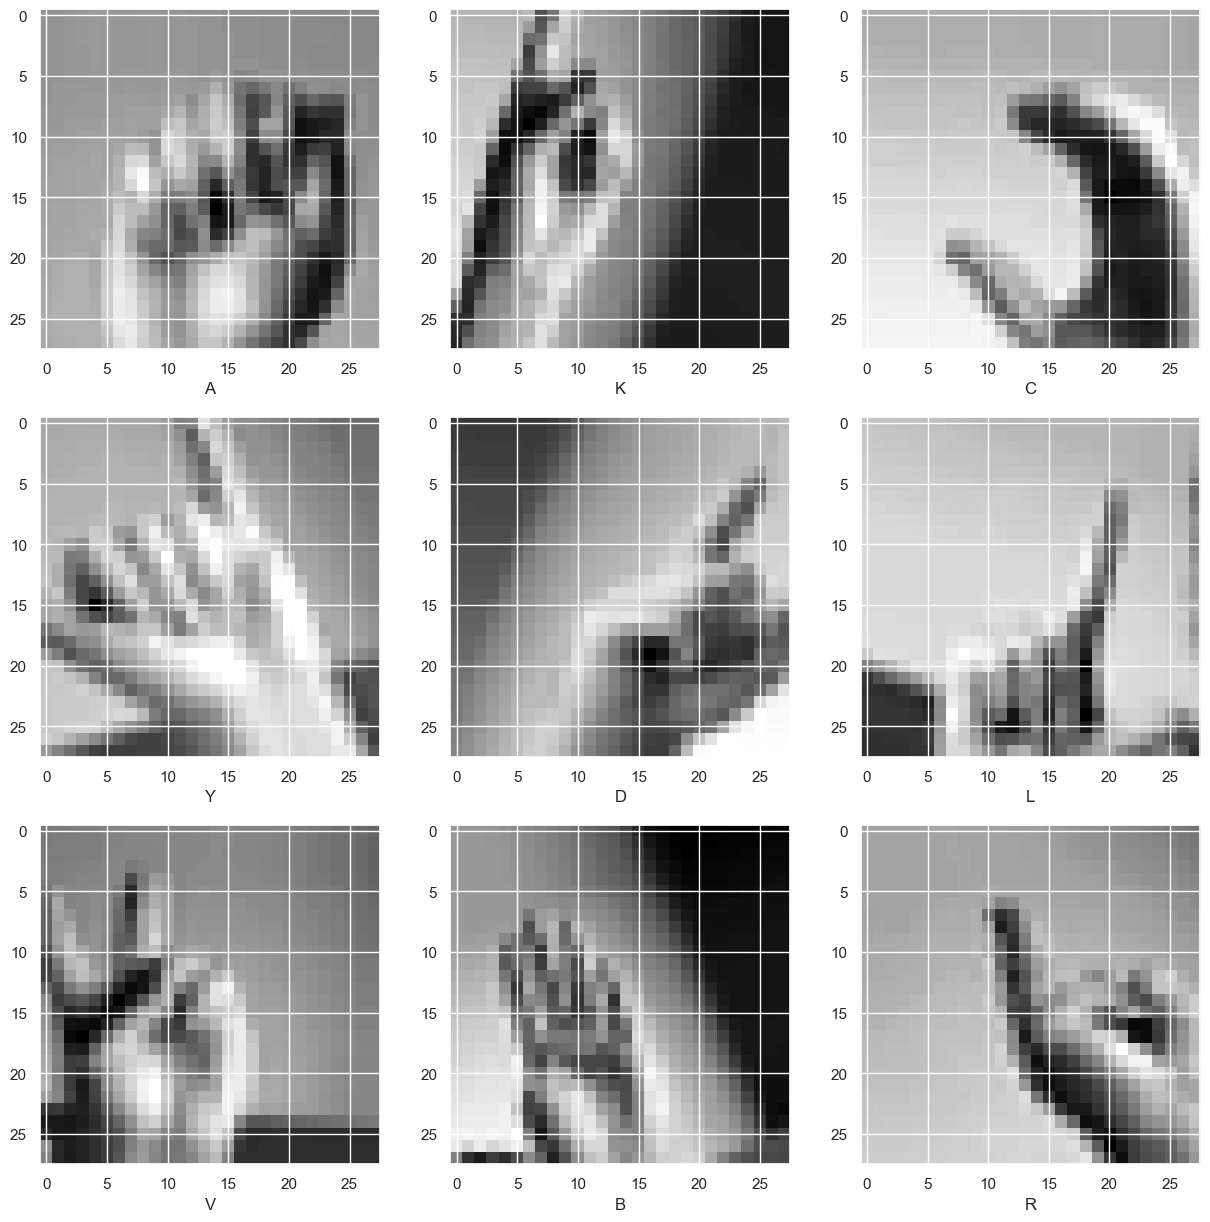

In [29]:
alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    for X_batch, Y_batch in X_train:
        image=X_batch[i]
        plt.imshow(image,cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

In [34]:
checkpoint_filepath = 'best_model.hdf5'
#"C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Sign language/amer_sign2.png"
callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [35]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),Dropout(0.2),Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),Dropout(0.2),
            Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
            MaxPool2D(2,2, padding='same'),
            Dropout(0.2),Flatten(), Dense(units=4096, activation="relu"),                 
            Dropout(0.2),Dense(units=1024, activation="relu"),
            Dropout(0.2),Dense(units=256, activation="relu"),
            Dropout(0.2),Dense(units=25, activation="softmax"),])
Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)        

In [36]:
history = Model.fit(X_train, validation_data=X_test, epochs=epochs, callbacks=callbacks)

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 3.0567 - accuracy: 0.0697

c:\Users\ayush\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/215 [==============================] - 139s 642ms/step - loss: 3.0567 - accuracy: 0.0697 - val_loss: 2.8965 - val_accuracy: 0.1003 - lr: 0.0010
Epoch 2/100
215/215 [==============================] - 159s 739ms/step - loss: 2.3215 - accuracy: 0.2398 - val_loss: 1.5771 - val_accuracy: 0.4021 - lr: 0.0010
Epoch 3/100
215/215 [==============================] - 119s 551ms/step - loss: 1.5878 - accuracy: 0.4439 - val_loss: 1.0035 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 4/100
215/215 [==============================] - 121s 563ms/step - loss: 1.2394 - accuracy: 0.5677 - val_loss: 0.6945 - val_accuracy: 0.7461 - lr: 0.0010
Epoch 5/100
215/215 [==============================] - 111s 518ms/step - loss: 1.0058 - accuracy: 0.6438 - val_loss: 0.4841 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 6/100
215/215 [==============================] - 107s 498ms/step - loss: 0.8407 - accuracy: 0.7050 - val_loss: 0.3187 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 7/100
215/215 [==============================]

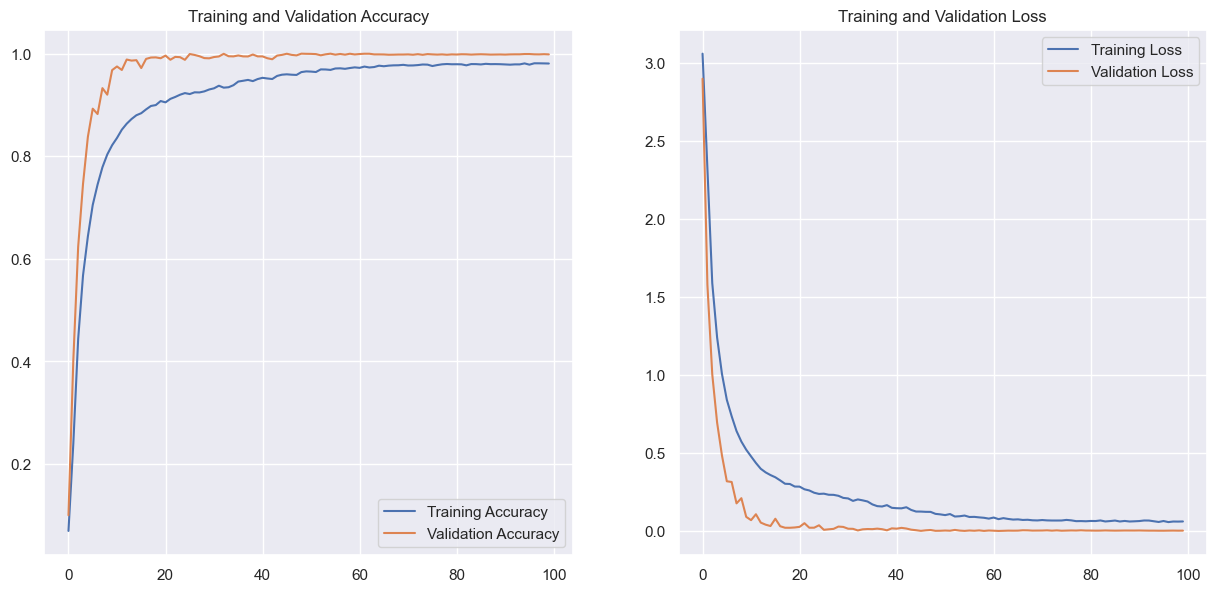

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
score = Model.evaluate(X_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

225/225 [==============================] - 5s 22ms/step - loss: 0.0027 - accuracy: 0.9986
Test loss: 0.0027061414439231157
Test accuracy: 0.9986056685447693


In [40]:
df_test = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Sign language/sign_mnist_test/sign_mnist_test.csv")
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [41]:
y_pred = np.argmax(Model.predict(X_test),axis = 1) 

225/225 [==============================] - 5s 22ms/step


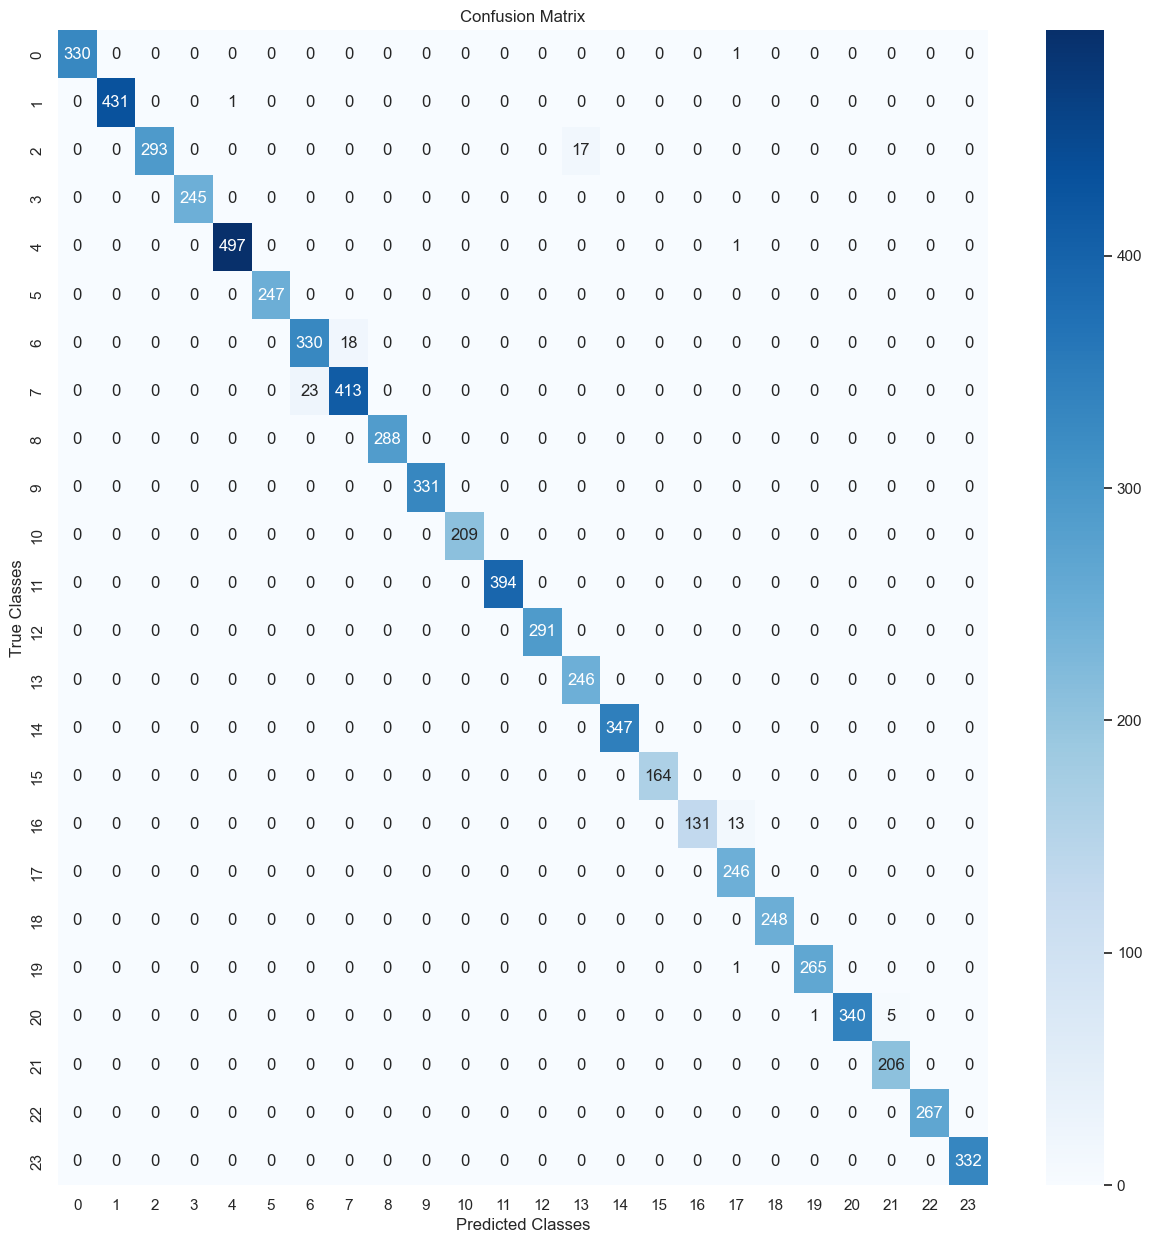

In [42]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

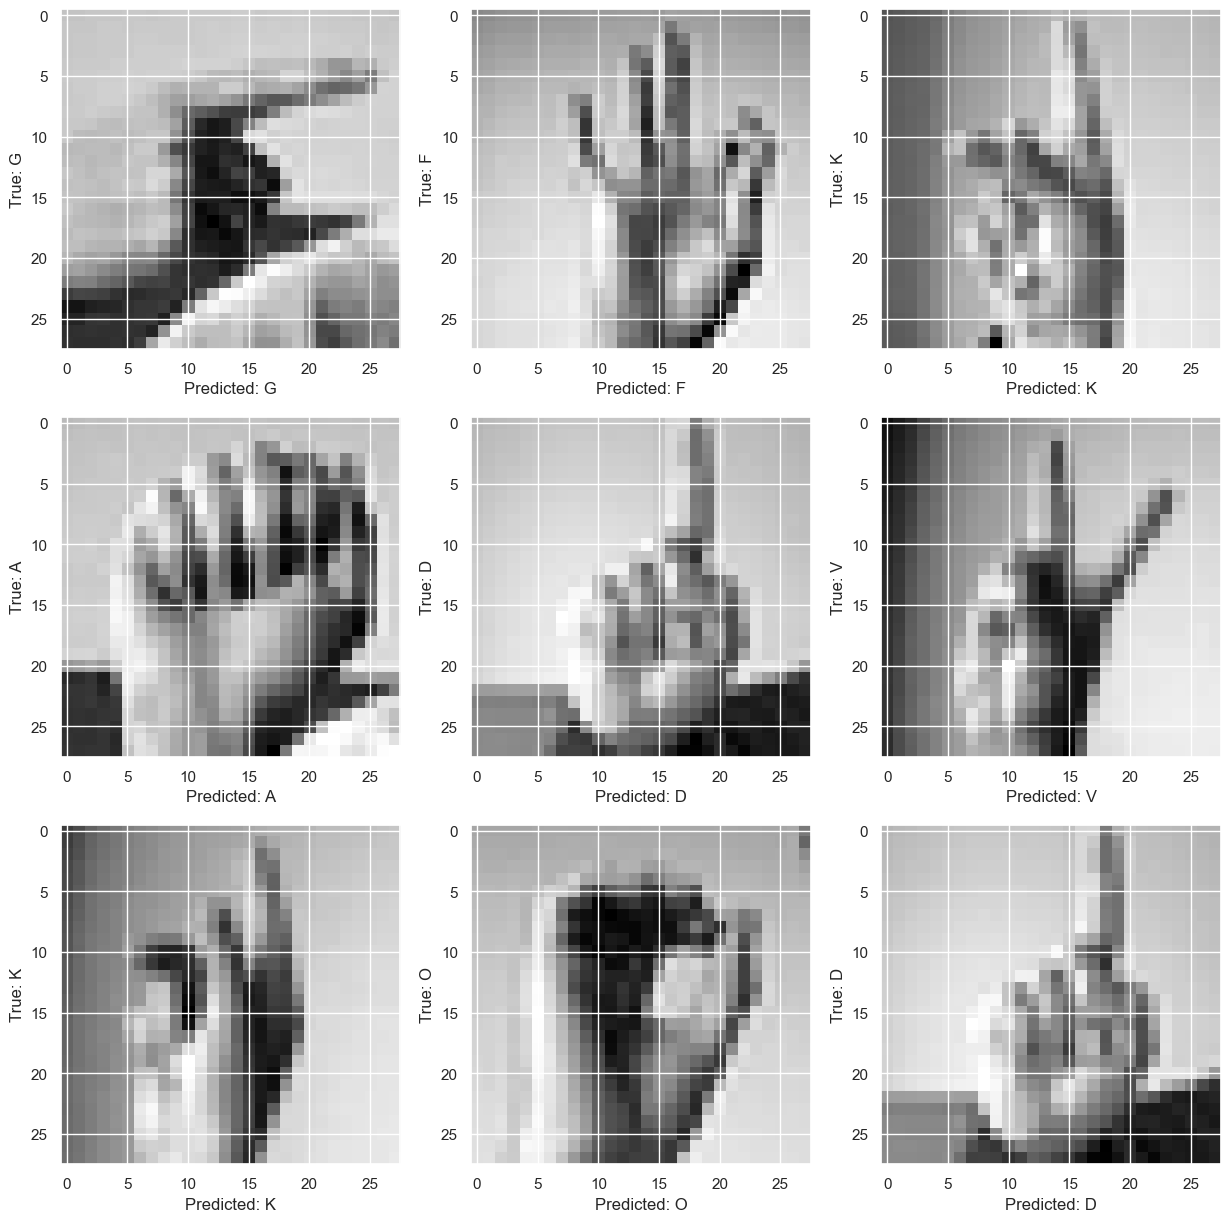

In [43]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()

### This model perfectly displays the alphabet to the corresponding image .The accuracy of the trained model is 99.86%